In [8]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

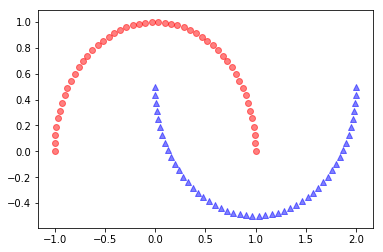

In [3]:
x, y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(x[y==0, 0], x[y==0, 1], color = 'red', marker = 'o', alpha = 0.5)
plt.scatter(x[y==1, 0], x[y==1, 1], color = 'blue', marker= '^', alpha = 0.5)
plt.show()

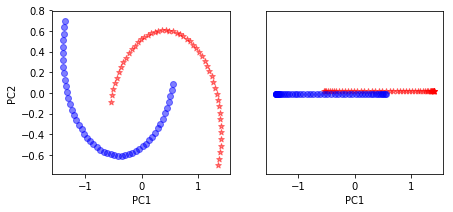

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x)
fig, ax = plt.subplots(nrows=1, ncols =2, figsize = (7,3))

ax[0].scatter(x_pca[y==0, 0], x_pca[y==0, 1], color ='red', marker ='*', alpha = 0.5)
ax[0].scatter(x_pca[y==1, 0], x_pca[y==1, 1], color = 'blue', marker ='o', alpha = 0.5)
ax[1].scatter(x_pca[y==0, 0], np.zeros((50, 1))+0.02, color = 'red', marker ='*', alpha = 0.5)
ax[1].scatter(x_pca[y==1, 0], np.zeros((50, 1))-0.02, color = 'blue', marker='o', alpha = 0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

In [11]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernal_pca(x, gamma, n_components):
    sq_dists = pdist(x, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    k = exp(-gamma * mat_sq_dists)
    n = k.shape[0]
    one_n = np.ones((n,n))/n
    k = k-one_n.dot(k) - k.dot(one_n) + one_n.dot(k).dot(one_n)
    eigvals, eigvecs = eigh(k)
    x_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    return x_pc

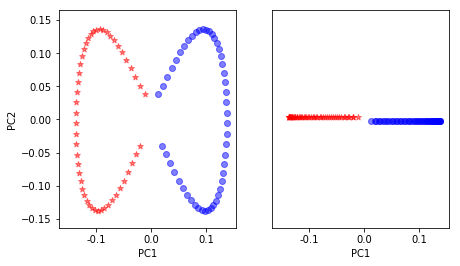

In [12]:
from matplotlib.ticker import FormatStrFormatter
x_kpca = rbf_kernal_pca(x, gamma = 15, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,4))
ax[0].scatter(x_kpca[y==0, 0], x_kpca[y==0, 1], color ='red', marker ='*', alpha = 0.5)
ax[0].scatter(x_kpca[y==1, 0], x_kpca[y==1, 1], color = 'blue', marker ='o', alpha = 0.5)
ax[1].scatter(x_kpca[y==0, 0], np.zeros((50, 1))+0.02, color = 'red', marker ='*', alpha = 0.5)
ax[1].scatter(x_kpca[y==1, 0], np.zeros((50, 1))-0.02, color = 'blue', marker='o', alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

# Circles

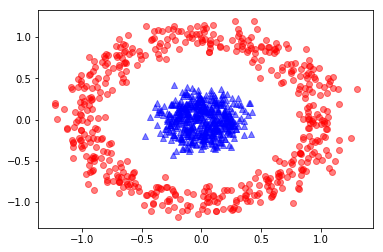

In [29]:
from sklearn.datasets import make_circles
x, y = make_circles(n_samples = 1000, random_state = 0, noise = 0.1, factor = 0.2)
plt.scatter(x[y==0, 0], x[y==0, 1], color = 'red', marker = 'o', alpha = 0.5)
plt.scatter(x[y==1, 0], x[y==1, 1], color = 'blue', marker= '^', alpha = 0.5)
plt.show()

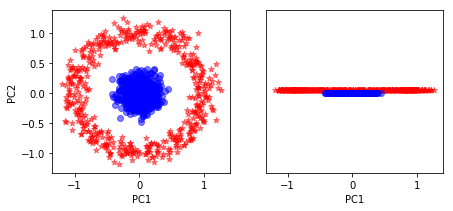

In [31]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x)
fig, ax = plt.subplots(nrows=1, ncols =2, figsize = (7,3))

ax[0].scatter(x_pca[y==0, 0], x_pca[y==0, 1], color ='red', marker ='*', alpha = 0.5)
ax[0].scatter(x_pca[y==1, 0], x_pca[y==1, 1], color = 'blue', marker ='o', alpha = 0.5)
ax[1].scatter(x_pca[y==0, 0], np.zeros((500, 1))+0.02, color = 'red', marker ='*', alpha = 0.5)
ax[1].scatter(x_pca[y==1, 0], np.zeros((500, 1))-0.02, color = 'blue', marker='o', alpha = 0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()